## Parte 1 - Análisis inicial

## Preparación de los datos

Se llaman las librerías necesarias su efecto:

In [1]:
import xml.etree.cElementTree as ET
import os
import random
import pandas as pd
import re
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt



Se extraen los datos de los archivos con diagnostico negativo de depresión. De los datos en el corpus se extraen el titulo y el texto.

In [ ]:
dirsNegative = ['SourceFiles/erisk 2017 - test split/negative_examples_anonymous/',
               'SourceFiles/erisk 2017 - training split/negative_examples_anonymous/',
               'SourceFiles/erisk 2018 - test split/neg/']
corpusNegative  = []
for direc in dirsNegative:
    directory = os.fsencode(direc)
    for file in os.listdir(directory):
        filename = os.fsdecode(file)
        tree = ET.parse(direc+filename)
        root = tree.getroot()
        i = 0
        for elem in root:
            if i > 0:
                if elem.find("TITLE").text.isspace():
                    s_title = "" 
                else:
                    s_title = re.sub('\n', '', elem.find("TITLE").text)
                s_date = elem.find("DATE").text 
                s_info = elem.find("INFO").text 
                if elem.find("TEXT").text.isspace():
                    s_text = "" 
                else:
                    s_text = re.sub('\n', ' ', elem.find("TEXT").text)
                    
                s_diagnose = "false"
                corpusNegative.append({"title": s_title, "date": s_date, "info": s_info, "text": s_text, "diagnose": s_diagnose})
            i = i + 1
    

Se extraen los datos de los archivos con diagnostico positivo de depresión.

In [3]:
dirsPositive = ['SourceFiles/erisk 2017 - test split/positive_examples_anonymous/',
                'SourceFiles/erisk 2017 - training split/positive_examples_anonymous/',
               'SourceFiles/erisk 2018 - test split/pos/']
corpusPositive  = []
for direc in dirsPositive:
    directory = os.fsencode(direc)
    for file in os.listdir(directory):
        filename = os.fsdecode(file)
        tree = ET.parse(direc+filename)
        root = tree.getroot()
        i = 0
        for elem in root:
            if i > 0:
                if elem.find("TITLE").text.isspace():
                    s_title = "" 
                else:
                    s_title = re.sub('\n', '', elem.find("TITLE").text)
                s_date = elem.find("DATE").text 
                s_info = elem.find("INFO").text 
                if elem.find("TEXT").text.isspace():
                    s_text = "" 
                else:
                    s_text = re.sub('\n', ' ', elem.find("TEXT").text)
                s_diagnose = "true"
                corpusPositive.append({"title": s_title, "date": s_date, "info": s_info, "text": s_text, "diagnose": s_diagnose})
            i = i + 1
    

Esta es la longitud de cada corpus, de los textos con casos positivos y negativos.

In [4]:
len(corpusPositive)

90222

In [5]:
len(corpusNegative)

986360

Se convierten las listas dataframes de Pandas:

In [6]:
dfPositive = pd.DataFrame(corpusPositive) 

In [11]:
dfNegative = pd.DataFrame(corpusNegative) 

In [8]:
dfPositive['text'] = dfPositive['title'].astype(str) + dfPositive['text'].astype(str)


In [13]:
dfNegative['text'] = dfNegative['title'].astype(str) + dfNegative['text'].astype(str)
dfNegative = dfNegative.drop(['title'], axis=1)

In [ ]:
dfPositive = dfPositive.drop(['title'], axis=1)

Se extraen los datos del conteo de palabras y carácteres del texto.

In [14]:
def word_count(sentence):
    if sentence=='':
        return 0
    else:
        return len(str(sentence).split(" "))


dfPositive['word_count_text'] = dfPositive['text'].apply(lambda x: word_count(x))
dfNegative['word_count_text'] = dfNegative['text'].apply(lambda x: word_count(x))

In [15]:
dfPositive['char_count_text'] = dfPositive['text'].str.len() 
dfNegative['char_count_text'] = dfNegative['text'].str.len() 

Se extraen los datos del promedio de tamaño de las palabras en el texto.

In [16]:
def avg_word(sentence):
    words = sentence.split()
    if len(words) == 0:
        return 0
    else:
      return (sum(len(word) for word in words)/len(words))

dfPositive['avg_word_text'] = dfPositive['text'].apply(lambda x: avg_word(x))
dfNegative['avg_word_text'] = dfNegative['text'].apply(lambda x: avg_word(x))


Se extraen los datos del promedio de tamaño de las palabras en el texto.

In [17]:
from nltk.corpus import stopwords
stop = stopwords.words('english')

def stop_words(sentence):
    words = sentence.split()
    if len(words) == 0:
        return -1
    else:
      return len([sentence for sentence in sentence.split() if sentence in stop])


dfPositive['stopwords_text'] = dfPositive['text'].apply(lambda x: stop_words(x))
dfNegative['stopwords_text'] = dfNegative['text'].apply(lambda x: stop_words(x))

In [18]:
dfPositive['percentage_stopwords'] = dfPositive['stopwords_text']/(dfPositive['word_count_text']/100)
dfNegative['percentage_stopwords'] = dfNegative['stopwords_text']/(dfNegative['word_count_text']/100)

In [19]:
import pickle
with open('dfPositive.pickle', 'wb') as handle:
    pickle.dump(dfPositive, handle, protocol=pickle.HIGHEST_PROTOCOL)
with open('dfNegative.pickle', 'wb') as handle:
    pickle.dump(dfNegative, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [7]:
import pickle
with open('dfPositive.pickle', 'rb') as handle:
     dfPositive = pickle.load(handle)
with open('dfNegative.pickle', 'rb') as handle:
     dfNegative = pickle.load(handle)

Aquí se pueden ver los dataframes de los datos positivos y negativos.

In [19]:
dfPositive

,date,info,text,diagnose,word_count_text,char_count_text,avg_word_text,stopwords_text,percentage_stopwords,tree
0,2015-05-04 07:25:36,reddit post,I go after what I want. Why should I wait for...,true,27,115,3.708333,10,37.037037,b'( Root (span 1 4)\r\n ( Nucleus (leaf 1) (r...
1,2014-11-27 18:45:56,reddit post,Air travel on thanksgiving...,true,6,31,6.500000,1,16.666667,No
2,2014-10-29 03:17:24,reddit post,Go Cyclones!!!,true,5,17,6.500000,0,0.000000,No
3,2014-10-26 19:39:11,reddit post,My parents grew up here (New Holland). It's l...,true,32,176,5.000000,7,21.875000,b'( Root (span 1 6)\r\n ( Nucleus (span 1 5) ...
4,2014-10-12 04:44:01,reddit post,Fifty Shades of Ebola,true,6,23,4.500000,1,16.666667,No
...,...,...,...,...,...,...,...,...,...,...
90217,2015-06-11 00:59:27,reddit post,Small claims court?,true,5,21,5.666667,0,0.000000,NaN
90218,2015-06-10 23:38:58,reddit post,"His physique is so good, his muscles can meta...",true,30,144,4.259259,10,33.333333,NaN
90219,2015-06-10 20:14:38,reddit post,jetpack made of muscle http://drmcninja.com...,true,9,68,12.000000,1,11.111111,NaN
90220,2015-05-29 15:06:29,reddit post,"For one, she said it would invalidate his pr...",true,33,176,4.965517,11,33.333333,NaN


In [20]:
dfNegative

,date,info,text,diagnose,word_count_text,char_count_text,avg_word_text,stopwords_text,percentage_stopwords
0,2015-07-22 04:10:12,reddit post,Or at least the best pickled herring you can ...,false,14,62,4.083333,5,35.714286
1,2015-07-22 04:09:18,reddit post,This is the best shit,false,7,23,3.400000,2,28.571429
2,2015-07-22 04:07:17,reddit post,My favorite snack (pickled herring + saltines),false,9,48,5.714286,0,0.000000
3,2015-07-21 16:51:21,reddit post,I make curried butternut squash risotto. Fusi...,false,14,75,5.166667,1,7.142857
4,2015-07-21 15:40:41,reddit post,"Bake like crazy. You can also freeze some, b...",false,39,191,4.250000,15,38.461538
...,...,...,...,...,...,...,...,...,...
986355,2016-11-25 17:50:40,reddit post,In what alternate reality would someone get p...,false,22,118,4.850000,6,27.272727
986356,2016-11-25 17:42:31,reddit post,"First you thought I was a propaganda bot, and...",false,20,95,4.222222,8,40.000000
986357,2016-11-25 17:25:23,reddit post,Look at your account. You do absolutely nothi...,false,37,213,5.057143,13,35.135135
986358,2016-11-25 17:25:03,reddit post,Look at your account. You do absolutely nothi...,false,37,215,5.114286,13,35.135135


## Análisis descriptivo de los datos

### Histogramas con casos negativos

#### Conteo de las palabras en el texto (de 1 a 100, sin contar los datos que están vacíos).

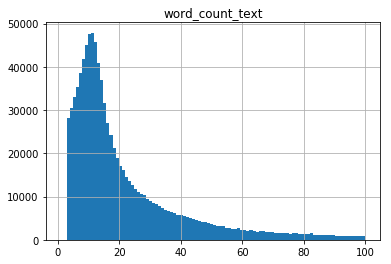

In [17]:
hist = dfNegative.hist(column='word_count_text', bins=100, range=(1,100)) 

#### Conteo de caracteres en el texto (de 1 a 100, sin contar los datos que están vacíos).

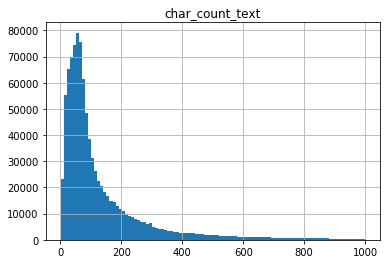

In [18]:
hist = dfNegative.hist(column='char_count_text', bins=100, range=(1,1000)) 

#### Promedio de caracteres por palabra en el título (mayores que 0)

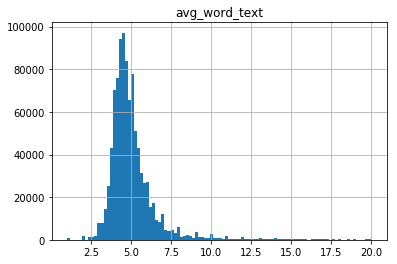

In [19]:
hist = dfNegative.hist(column='avg_word_text', bins=100, range=(1,20)) 

#### Número de stopwords en el texto (cuando el texto no es vacío)

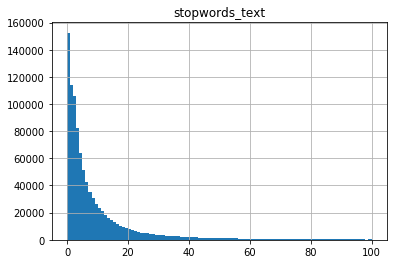

In [20]:
hist = dfNegative.hist(column='stopwords_text', bins=100, range=(0,100)) 

#### Porcentaje de stopwords en el texto (cuando el texto no es vacío)

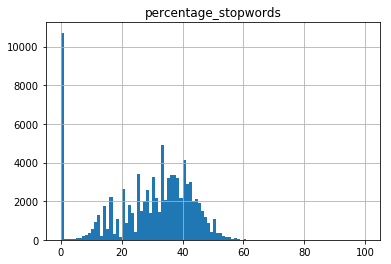

In [21]:
hist = dfPositive.hist(column='percentage_stopwords', bins=100, range=(0,100)) 

### Histograma con casos positivos

#### Conteo de las palabras en el texto (de 1 a 100, sin contar los datos que están vacíos).

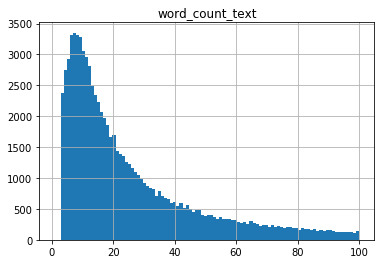

In [22]:
hist = dfPositive.hist(column='word_count_text', bins=100, range=(1,100)) 

#### Conteo de caracteres en el texto (de 1 a 100, sin contar los datos que están vacíos).

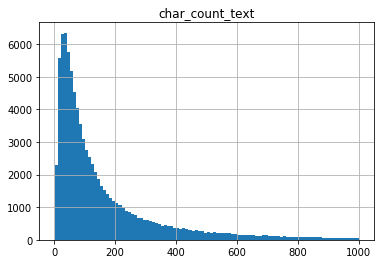

In [23]:
hist = dfPositive.hist(column='char_count_text', bins=100, range=(1,1000)) 

#### Promedio de caracteres por palabra en el texto (mayores que 0)

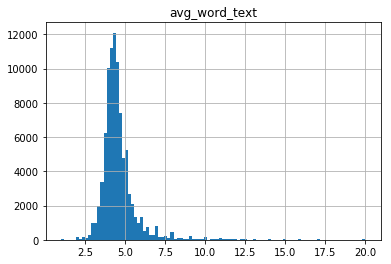

In [24]:
hist = dfPositive.hist(column='avg_word_text', bins=100, range=(1,20)) 

#### Número de stopwords en el texto (cuando el texto no es vacío)

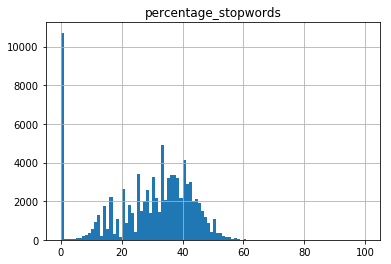

In [25]:
hist = dfPositive.hist(column='percentage_stopwords', bins=100, range=(0,100)) 

### Histogramas con datos conjuntos

Los datos del dataset con datos con diagnóstico negativo están en rojo y los datos con el diagnóstico positivo están en verde.

#### Conteo de las palabras en el texto (de 1 a 100, sin contar los datos que están vacíos).

<BarContainer object of 20 artists>

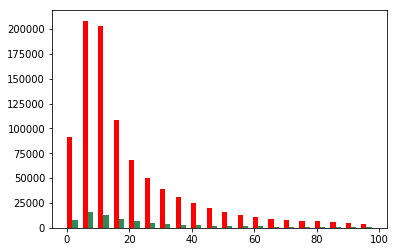

In [26]:
fig, ax = plt.subplots()

a_heights, a_bins = np.histogram(dfNegative['word_count_text'], bins=20, range=(1,100))
b_heights, b_bins = np.histogram(dfPositive['word_count_text'], bins=20, range=(1,100))

width = (a_bins[1] - a_bins[0])/3

ax.bar(a_bins[:-1], a_heights, width=width, facecolor='red')
ax.bar(b_bins[:-1]+width, b_heights, width=width, facecolor='seagreen')

#### Conteo de las caracteres en el texto (de 1 a 100, sin contar los datos que están vacíos).

<BarContainer object of 20 artists>

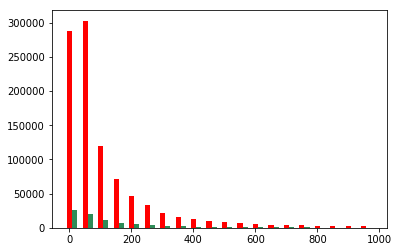

In [27]:
fig, ax = plt.subplots()

a_heights, a_bins = np.histogram(dfNegative['char_count_text'], bins=20, range=(1,1000))
b_heights, b_bins = np.histogram(dfPositive['char_count_text'], bins=20, range=(1,1000))

width = (a_bins[1] - a_bins[0])/3

ax.bar(a_bins[:-1], a_heights, width=width, facecolor='red')
ax.bar(b_bins[:-1]+width, b_heights, width=width, facecolor='seagreen')

#### Promedio de caracteres por palabras en el texto (de 1 a 10, sin contar los datos que están vacíos).

<BarContainer object of 20 artists>

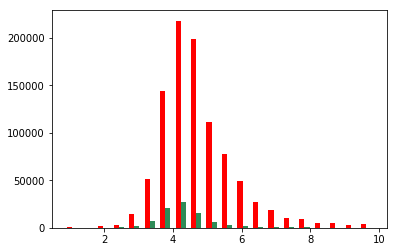

In [28]:
fig, ax = plt.subplots()

a_heights, a_bins = np.histogram(dfNegative['avg_word_text'], bins=20, range=(1,10))
b_heights, b_bins = np.histogram(dfPositive['avg_word_text'], bins=20, range=(1,10))

width = (a_bins[1] - a_bins[0])/3

ax.bar(a_bins[:-1], a_heights, width=width, facecolor='red')
ax.bar(b_bins[:-1]+width, b_heights, width=width, facecolor='seagreen')

#### Número de stopwords en el texto (de 1 a 20, sin contar los datos que están vacíos).

<BarContainer object of 20 artists>

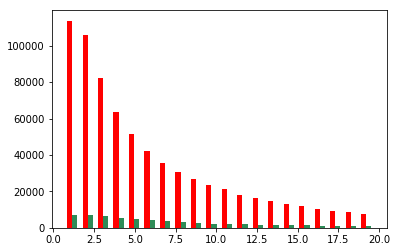

In [29]:
fig, ax = plt.subplots()

a_heights, a_bins = np.histogram(dfNegative['stopwords_text'], bins=20, range=(1,20))
b_heights, b_bins = np.histogram(dfPositive['stopwords_text'], bins=20, range=(1,20))

width = (a_bins[1] - a_bins[0])/3

ax.bar(a_bins[:-1], a_heights, width=width, facecolor='red')
ax.bar(b_bins[:-1]+width, b_heights, width=width, facecolor='seagreen')

#### Porcentaje de stopwords en el texto.

<BarContainer object of 20 artists>

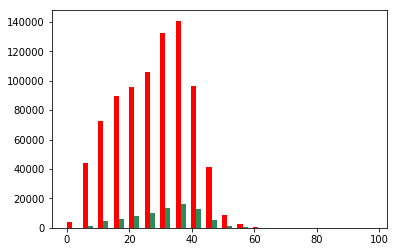

In [30]:
fig, ax = plt.subplots()

a_heights, a_bins = np.histogram(dfNegative['percentage_stopwords'], bins=20, range=(1,100))
b_heights, b_bins = np.histogram(dfPositive['percentage_stopwords'], bins=20, range=(1,100))

width = (a_bins[1] - a_bins[0])/3

ax.bar(a_bins[:-1], a_heights, width=width, facecolor='red')
ax.bar(b_bins[:-1]+width, b_heights, width=width, facecolor='seagreen')

### Promedios de columnas

**Promedio de cantidad de palabras:** Los textos con diagnostico positivo, tienen más palabras que los textos con diagnostico negativo.

In [31]:
dfPositive["word_count_text"].mean()

42.805779078273595

In [32]:
dfNegative["word_count_text"].mean()

34.39070623301837

**Promedio de cantidad de caracteres:** Los textos con diagnostico positivo, tienen más caracteres que los textos con diagnostico negativo.

In [33]:
dfPositive["char_count_text"].mean()

216.6376161025027

In [34]:
dfNegative["char_count_text"].mean()

185.93815341254714

**Promedio de cantidad de caracteres por palabra:** Los textos con diagnostico positivo, tienen menos caracteres por palabra que los textos con diagnostico negativo.

In [35]:
dfPositive["avg_word_text"].mean()

4.872828461635376

In [36]:
dfNegative["avg_word_text"].mean()

6.004193967515472

**Promedio de cantidad de stopwords:** Los textos con diagnostico positivo, tienen más stopwords que los textos con diagnostico negativo

In [37]:
dfPositive["stopwords_text"].mean()

15.866828489725345

In [38]:
dfNegative["stopwords_text"].mean()

11.596888559957824

### Medianas de columnas

**Mediana de porcentaje de cantidad de stopwords:** Los textos con diagnostico positivo, tienen más una mediana más grande que los textos con diagnostico negativo

In [39]:
dfPositive["percentage_stopwords"].median()

32.55813953488372

In [40]:
dfNegative["percentage_stopwords"].median()

27.586206896551726

**Mediana de cantidad de palabras:** Los textos con diagnostico positivo, tienen más una mediana más grande que los textos con diagnostico negativo.

In [41]:
dfPositive["word_count_text"].median()

20.0

In [42]:
dfNegative["word_count_text"].median()

15.0

**Mediana de cantidad de caracteres:** Los textos con diagnostico positivo, tienen más una mediana más grande de más caracteres que los textos con diagnostico negativo.



In [43]:
dfPositive["char_count_text"].median()

95.0

In [44]:
dfNegative["char_count_text"].median()

78.0

**Promedio de cantidad de caracteres por palabra:** Los textos con diagnostico positivo, tienen una media de menos caracteres por palabra que los textos con diagnostico negativo.

In [45]:
dfPositive["avg_word_text"].median()

4.375817552259223

In [46]:
dfNegative["avg_word_text"].median()

4.714285714285714

# Análisis de los textos usando Genisim

Se importan las librerías necesarias:

In [47]:
import gensim
from gensim import corpora
from pprint import pprint
from gensim.utils import simple_preprocess
from smart_open import smart_open
from gensim import models
import os

Se toma crea y se extrae el texto del diccionario.

In [48]:
textNegative = [[text for text in doc.split()] for doc in dfNegative["text"]]
textPositive = [[text for text in doc.split()] for doc in dfPositive["text"]]

In [49]:
dictionaryNegative  = corpora.Dictionary(textNegative)
dictionaryPositive  = corpora.Dictionary(textPositive)

In [50]:
print(dictionaryPositive)

Dictionary(189054 unique tokens: ['I', 'Why', 'after', 'else', 'expectations!']...)


In [58]:
print(dictionaryNegative)

Dictionary(1110933 unique tokens: ['Indiana.', 'Or', 'at', 'best', 'can']...)


Se 'tokeniza' el texto.

In [51]:
tokenized_list_negative = [simple_preprocess(doc) for doc in dfNegative["text"]]
tokenized_list_positive = [simple_preprocess(doc) for doc in dfPositive["text"]]

Se extrae el corpus, y su frecuencia entre los textos.

In [52]:
mydict = corpora.Dictionary()

corpus_negative = [mydict.doc2bow(doc, allow_update=True) for doc in tokenized_list_negative]
corpus_positive = [mydict.doc2bow(doc, allow_update=True) for doc in tokenized_list_positive]

In [68]:
corpus_negative[1]

[(1, 1), (10, 1), (12, 1), (13, 1), (14, 1)]

Se obtiene el valor TFI-DF de cada palabra.

In [53]:
tfidf_negative = models.TfidfModel(corpus_negative, smartirs='ntc')
tfidf_positive = models.TfidfModel(corpus_positive, smartirs='ntc')

In [75]:
tfidf_negative

El valor TFI-DF de las primeras oraciones.

In [56]:
i=0
for doc in tfidf_negative[corpus_negative]:
    i=i+1
    print([[mydict[id], np.around(freq, decimals=2)] for id, freq in doc])
    if i==10:
        break
        

[['at', 0.14], ['best', 0.22], ['can', 0.14], ['get', 0.16], ['herring', 0.54], ['in', 0.08], ['indiana', 0.43], ['least', 0.25], ['or', 0.14], ['pickled', 0.56], ['the', 0.05], ['you', 0.09]]
[['best', 0.61], ['the', 0.13], ['is', 0.23], ['shit', 0.68], ['this', 0.3]]
[['herring', 0.46], ['pickled', 0.47], ['favorite', 0.25], ['my', 0.11], ['saltines', 0.57], ['snack', 0.4]]
[['is', 0.06], ['awesome', 0.21], ['butternut', 0.45], ['curried', 0.47], ['fusion', 0.35], ['make', 0.14], ['risotto', 0.43], ['squash', 0.39], ['too', 0.15], ['try', 0.18]]
[['can', 0.08], ['in', 0.05], ['the', 0.06], ['you', 0.06], ['also', 0.11], ['and', 0.04], ['bake', 0.28], ['been', 0.11], ['but', 0.07], ['crazy', 0.19], ['doesn', 0.14], ['eating', 0.2], ['food', 0.17], ['for', 0.06], ['forever', 0.22], ['freeze', 0.27], ['freezer', 0.29], ['got', 0.13], ['had', 0.11], ['it', 0.05], ['jsyk', 0.48], ['last', 0.14], ['like', 0.08], ['made', 0.13], ['mistake', 0.22], ['months', 0.17], ['of', 0.04], ['poisoning

In [57]:
i=0
for doc in tfidf_positive[corpus_positive]:
    i=i+1
    print([[mydict[id], np.around(freq, decimals=2)] for id, freq in doc])
    if i==10:
        break

[['the', 0.05], ['my', 0.1], ['make', 0.2], ['for', 0.1], ['why', 0.21], ['to', 0.06], ['have', 0.11], ['after', 0.22], ['own', 0.27], ['what', 0.14], ['first', 0.21], ['if', 0.13], ['wait', 0.31], ['someone', 0.22], ['go', 0.19], ['move', 0.33], ['want', 0.19], ['should', 0.22], ['else', 0.26], ['expectations', 0.48]]
[['on', 0.14], ['thanksgiving', 0.67], ['travel', 0.53], ['air', 0.5]]
[['go', 0.24], ['cyclones', 0.97]]
[['can', 0.08], ['the', 0.06], ['my', 0.12], ['and', 0.04], ['it', 0.04], ['like', 0.07], ['of', 0.05], ['here', 0.12], ['country', 0.21], ['what', 0.08], ['up', 0.09], ['second', 0.18], ['part', 0.16], ['beautiful', 0.2], ['new', 0.14], ['without', 0.16], ['fresh', 0.25], ['getting', 0.14], ['leave', 0.19], ['grew', 0.24], ['home', 0.16], ['parents', 0.18], ['air', 0.23], ['smelling', 0.35], ['holland', 0.38], ['achenbachs', 0.45]]
[['of', 0.08], ['shades', 0.53], ['fifty', 0.58], ['ebola', 0.62]]
[['the', 0.06], ['is', 0.1], ['brand', 0.47], ['duck', 0.63], ['print

# Análisis de los textos usando NLTK

In [65]:
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/raulbarrantes/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/raulbarrantes/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [63]:
tokens_negative = [nltk.word_tokenize(doc) for doc in dfNegative["text"]]
tokens_positive = [nltk.word_tokenize(doc) for doc in dfPositive["text"]]

In [66]:
tagged_tokens_negative = [nltk.pos_tag(tokens) for tokens in tokens_negative]
tagged_tokens_positive = [nltk.pos_tag(tokens) for tokens in tokens_positive]

In [73]:
tagged_tokens_positive[100]

[('Will', 'MD'),
 ('second', 'VB'),
 ('this', 'DT'),
 ('statement', 'NN'),
 ('...', ':'),
 ('...', ':'),
 ('What', 'WP'),
 ('the', 'DT'),
 ('actual', 'JJ'),
 ('fuck', 'NN'),
 ('did', 'VBD'),
 ('I', 'PRP'),
 ('just', 'RB'),
 ('read', 'VB'),
 ('?', '.')]

In [69]:
tagged_tokens_negative[1]

[('This', 'DT'), ('is', 'VBZ'), ('the', 'DT'), ('best', 'JJS'), ('shit', 'NN')]

# Obtención de items más frecuentes

In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

## Corpus de casos positivos

Se genera el objeto CountVectorizer, notar que se ponen como stop-words las palabras en inglés destinadas a ese tipo, según los diccionarios de los Vectorizer, además se filtran palabras con números usando regex.

In [63]:
cv=CountVectorizer(stop_words='english', min_df = 10, token_pattern=u'(?ui)\\b\\w*[a-z]+\\b')
cv_fit=cv.fit_transform(dfPositive["text"])   
word_count_vector=cv.fit_transform(dfPositive["text"])
word_list = cv.get_feature_names();    
count_list = cv_fit.toarray().sum(axis=0) 
x2 = dict(zip(word_list,count_list))
 

Aqui la listas de las palabras más frecuentes.

In [64]:
i=0
d_view = [ (v,k) for k,v in x2.items() ]
d_view.sort(reverse=True) 
for v,k in d_view:
    print ("%s: %d" % (k,v))
    i=i+1
    if(i==20):
        break

t: 37704
s: 35833
m: 20101
just: 19837
like: 19012
don: 13456
people: 10756
know: 9989
really: 9728
ve: 9554
time: 9137
think: 9026
good: 7121
want: 6925
feel: 6044
d: 5748
going: 5732
make: 5428
way: 5190
got: 5156


## Corpus de casos negativos

Se genera el objeto CountVectorizer, notar que se ponen como stop-words las palabras en inglés destinadas a ese tipo, según los diccionarios de los Vectorizer, además se filtran palabras con números usando regex.

In [65]:
dfNegativeSample = pd.DataFrame(random.sample(corpusNegative, 90222)) 

In [66]:
cv_fit=cv.fit_transform(dfNegativeSample["text"])   

In [67]:
word_count_vector=cv.fit_transform(dfNegativeSample["text"])

In [68]:
word_list = cv.get_feature_names();    

In [69]:
count_list = cv_fit.toarray().sum(axis=0) 

In [70]:
x2 = dict(zip(word_list,count_list))

Aqui la listas de las palabras más frecuentes.

In [71]:
i=0
d_view = [ (v,k) for k,v in x2.items() ]
d_view.sort(reverse=True) 
for v,k in d_view:
    print ("%s: %d" % (k,v))
    i=i+1
    if(i==200):
        break

s: 22046
t: 19243
like: 9966
just: 9769
com: 7771
m: 6961
http: 6399
people: 6389
don: 6287
www: 5207
think: 5093
time: 5083
know: 4848
really: 4228
good: 4188
https: 3892
ve: 3647
d: 3422
make: 3291
way: 3239
r: 3193
want: 3166
did: 3038
new: 2996
going: 2899
right: 2866
got: 2582
say: 2390
ll: 2387
reddit: 2377
work: 2344
need: 2285
said: 2280
thing: 2242
didn: 2160
sure: 2153
actually: 2122
use: 2120
game: 2119
years: 2108
does: 2107
lot: 2098
day: 2058
things: 2045
great: 2027
better: 1961
feel: 1912
thanks: 1864
doesn: 1855
watch: 1835
pretty: 1832
look: 1797
love: 1720
post: 1703
long: 1700
life: 1698
point: 1626
year: 1604
best: 1597
little: 1589
thought: 1562
read: 1559
probably: 1551
used: 1514
man: 1513
world: 1501
maybe: 1475
let: 1464
isn: 1437
help: 1388
bad: 1363
yes: 1360
different: 1344
yeah: 1336
comments: 1335
getting: 1334
money: 1316
come: 1310
doing: 1304
try: 1295
old: 1290
mean: 1285
guy: 1269
story: 1257
big: 1247
u: 1245
shit: 1245
org: 1242
movie: 1200
youtube

# Obtención de items centrales

Se inicializa el TfidfVectorizer para mostrar los elementos centrales del documento.

In [72]:
vectorizer = TfidfVectorizer(stop_words='english', min_df = 10,use_idf=True, token_pattern=u'(?ui)\\b\\w*[a-z]+\\b')
X = vectorizer.fit_transform(dfNegativeSample["text"])
idf = vectorizer._tfidf.idf_
x1 = dict(zip(vectorizer.get_feature_names(), idf))

Aqui la listas de las palabras centrales.

In [73]:
i=0
d_view = [ (v,k) for k,v in x1.items() ]
d_view.sort(reverse=True)
for v,k in d_view:
    print ("%s: %f" % (k,v))
    i=i+1
    if(i==20):
        break

zack: 10.012144
yummy: 10.012144
yrs: 10.012144
yolk: 10.012144
yoda: 10.012144
ymmv: 10.012144
yeh: 10.012144
yearly: 10.012144
yanked: 10.012144
xbone: 10.012144
wrestlers: 10.012144
wounded: 10.012144
wouldve: 10.012144
worm: 10.012144
wives: 10.012144
widget: 10.012144
wicker: 10.012144
whitehouse: 10.012144
whiny: 10.012144
weighs: 10.012144


In [74]:
vectorizer = TfidfVectorizer(stop_words={'english'}, min_df = 10,use_idf=True, token_pattern=u'(?ui)\\b\\w*[a-z]+\\b')
X = vectorizer.fit_transform(dfPositive["text"])
idf = vectorizer._tfidf.idf_
x1 = dict(zip(vectorizer.get_feature_names(), idf))

In [75]:
i=0
d_view = [ (v,k) for k,v in x1.items() ]
d_view.sort(reverse=True)
for v,k in d_view:
    print ("%s: %f" % (k,v))
    i=i+1
    if(i==20):
        break

youll: 10.012144
xxx: 10.012144
xt: 10.012144
wrenching: 10.012144
wrecks: 10.012144
wraps: 10.012144
wonderfully: 10.012144
witches: 10.012144
wip: 10.012144
winnipeg: 10.012144
winded: 10.012144
whopping: 10.012144
whispering: 10.012144
westboro: 10.012144
wendyfiore: 10.012144
weezer: 10.012144
weary: 10.012144
wattpad: 10.012144
warp: 10.012144
wandered: 10.012144
